<font color = green >

# Home task

</font>

## Titanic - Machine Learning from Disaster

Predict survival on the [Titanic](https://www.kaggle.com/c/titanic)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
import os
# current working directory
cwd = os.getcwd()
path = os.path.join(cwd, 'data')

## Load train data

In [88]:
def get_train_set():

    print('loading provided train set.')
    fp = os.path.join(path, "train.csv")
    df_train = pd.read_csv(fp, encoding='ISO-8859-1', low_memory=False)

    return df_train

df_train = get_train_set()
df_train.head()

loading provided train set.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Load test dataset 

In [89]:
def get_test_set():
    print('loading provided test set .')
    fp = os.path.join(path,'test.csv')
    df_test = pd.read_csv(fp, encoding='ISO-8859-1',low_memory = False)
    return df_test

df_test = get_test_set()
df_test.head()

loading provided test set .


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Load gender_submission

In [90]:
def get_gender_submission():
    print('loading gender_submission')
    fp = os.path.join(path, 'gender_submission.csv')
    y_test = pd.read_csv(fp, encoding='ISO-8859-10',low_memory = False)
    y_test = y_test['Survived']

    return y_test

y_test = get_gender_submission()
y_test

loading gender_submission


0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

## Get rid of samples with no information about payment 

In [91]:
def clean_blank_target(df):
    print('cleaning blank target.')
    print('Len before cleaning= {:,}'.format(len(df)))
    df = df.dropna(subset=['Survived'])
    # the same as  df_train = df_train[~df_train['compliance'].isnull()]
    print('Len after cleaning= {:,}'.format(len(df)))
    return df

df_train = clean_blank_target(df_train)

cleaning blank target.
Len before cleaning= 891
Len after cleaning= 891


### Avoid NAN values

In [92]:
# check the na columns
df_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [93]:
def fill_NaN(df):
    print('filling NaN...')
    for col in list(df):
        df[col] = df[col].fillna(0)


fill_NaN(df_train)
fill_NaN(df_test)

df_train.isna().any().any(), df_test.isna().any().any()

filling NaN...
filling NaN...


(False, False)

## Get rid of irrelevant features

In [94]:
def get_X_train_test(df_train,df_test):
   print('Extracting features.')
   # List of features to consider
   colons_to_keep=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
   
   X_train = df_train[colons_to_keep]
   X_train.set_index('PassengerId', inplace=True)
   
   X_test = df_test[colons_to_keep]
   X_test.set_index('PassengerId', inplace=True)

   return X_train, X_test

X_train, X_test = get_X_train_test(df_train, df_test)

X_train.shape

Extracting features.


(891, 7)

## Encoder non-numeric features  

In [95]:
# Check the types of data features
X_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [96]:
# Non-numeric strings
columns_to_encode = ['Sex', 'Embarked']

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
def label_encoder(X_train,X_test):
    print('label encoding')
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    for col in columns_to_encode:
        le = LabelEncoder().fit(X_train[col].astype(str))
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
        
    return X_train,X_test
        
X_train,X_test = label_encoder(X_train,X_test)
X_train.dtypes


label encoding


Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

## Normalize the data

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
def Normalize(X_train,X_test):
    print('Normalizing')
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled,X_test_scaled = Normalize(X_train,X_test)
type(X_train_scaled)

Normalizing


numpy.ndarray

## Choose the best classifier 

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

In [102]:
def run_GridSearchCV(clf, grid_values, X_train_scaled,X_test_scaled, y_train,y_test = None):
    print('Running GridSearchCV.')
    grid_clf = GridSearchCV(clf, param_grid=grid_values, scoring='f1')
    grid_clf.fit(X_train_scaled, y_train)
    print('Grid best parameter (max f1 ): ', grid_clf.best_params_)
    print('Grid best score (f1): ', grid_clf.best_score_)
    
    if not y_test is None:
        test_score = grid_clf.score(X_test_scaled, y_test)
        print("test f1= {}".format(test_score))


def run_GradientBoostingClassifier(X_train_scaled, y_train):
    print ('\nGradientBoostingClassifier.')
    clf = GradientBoostingClassifier() # learning_rate = 0.03)       
    grid_values = {'max_depth': [3,5,7]}
    run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)

## Execute all preprocessing

In [103]:
def apply_preprocessing(df_train,df_test):
    df_train = get_train_set()
    df_test = get_test_set()
    y_test = get_gender_submission()
     
    df_train = clean_blank_target(df_train)
    
    fill_NaN(df_train)
    fill_NaN(df_test)
    
    X_train, X_test = get_X_train_test(df_train, df_test)
    y_train = df_train['Survived']
    
    X_train, X_test = label_encoder(X_train, X_test)
    
    X_train_scaled, X_test_scaled = Normalize(X_train, X_test)
    
    return X_train_scaled, X_test_scaled, y_train,y_test    

## Split train set to evaluate the model 

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
df = get_train_set()
df_train, df_test = train_test_split(df, random_state=0)
X_train_scaled, X_test_scaled, y_train, y_test = apply_preprocessing(
    df_train, df_test)

print('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(
    X_train_scaled.shape, X_test_scaled.shape))
print('y_train set shape= {}\ny_test set shape= {}'.format(
    y_train.shape, y_test.shape))

loading provided train set.
loading provided train set.
loading provided test set .
loading gender_submission
cleaning blank target.
Len before cleaning= 891
Len after cleaning= 891
filling NaN...
filling NaN...
Extracting features.
label encoding
Normalizing
X_train_scaled shape= (891, 7)
X_test_scaled shape= (418, 7)
y_train set shape= (891,)
y_test set shape= (418,)


In [106]:
run_GradientBoostingClassifier(X_train_scaled, y_train)


GradientBoostingClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 5}
Grid best score (f1):  0.7612949294004118
test f1= 0.7931034482758622


## Predict the test set for best classifier

In [107]:
# Conclusion: Let's exploit the RandomForestClassifier. {'n_estimators': 20}
from sklearn.model_selection import cross_val_score # need to manually determine the best param
clf = RandomForestClassifier(n_estimators=20)

# review perfromance on whole set
f1_train = cross_val_score(clf, X_train_scaled,y_train, cv=5, scoring='f1')

print(f1_train)

# train and predict X_test

clf.fit(X_train_scaled, y_train)

y_predict = clf.predict(X_test_scaled)

# make sure it produce not all zeros
np.mean(y_predict)

[0.71111111 0.71317829 0.8030303  0.67213115 0.7826087 ]


0.3349282296650718

## Features importance

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
clf = GradientBoostingClassifier(max_depth=5).fit(X_train_scaled, y_train)
print("test accuracy= {:.3%}".format(clf.score(X_test_scaled, y_test)))

feature_importance = clf.feature_importances_
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

test accuracy= 85.646%


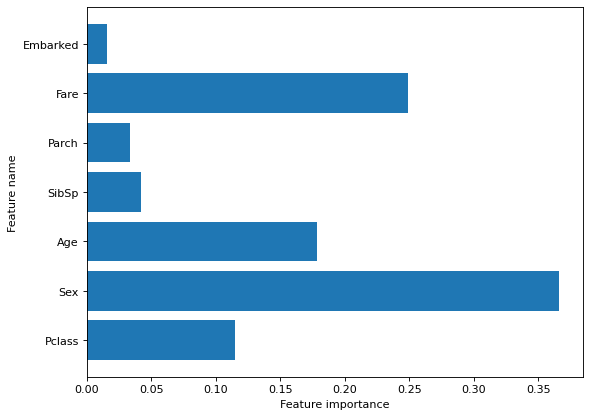

In [110]:
def plot_feature_importances(clf, features):
    plt.figure(figsize=(8, 6), dpi=80)
    plt.barh(features, clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.show()
    
plot_feature_importances(clf,features)

## Creating a file for kaggle

In [111]:
X_test = get_test_set()

submission_preds = clf.predict(X_test_scaled)
test_Id = X_test["PassengerId"]
df = pd.DataFrame({"PassengerId": test_Id.values,
                  "Survived": submission_preds
                  })

loading provided test set .


In [112]:
df.to_csv("submission.csv",index=False)